In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
# load dataset
data=pd.read_csv("cleaned_data.csv")

In [2]:
# inspect the data
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         732 non-null    int64  
 1   Job Title          732 non-null    object 
 2   Salary Estimate    732 non-null    object 
 3   Job Description    732 non-null    object 
 4   Rating             732 non-null    float64
 5   Company Name       732 non-null    object 
 6   Location           732 non-null    object 
 7   Headquarters       732 non-null    object 
 8   Size               732 non-null    object 
 9   Founded            732 non-null    int64  
 10  Type of ownership  732 non-null    object 
 11  Industry           732 non-null    object 
 12  Sector             732 non-null    object 
 13  Revenue            732 non-null    object 
 14  Competitors        732 non-null    object 
 15  hourly             732 non-null    int64  
 16  employer_provided  732 non

In [4]:
data.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.058743,3.665574,1862.266393,0.032787,0.010929,74.209016,127.960383,100.265027,0.565574,47.241803,0.534153,0.002732,0.228142,0.237705,0.521858,3879.870219,1.068306
std,214.364624,0.640187,451.353522,0.178200,0.104040,30.779855,45.484169,38.958168,0.496020,53.854597,0.499173,0.052235,0.419922,0.425969,0.499864,1528.435875,1.388138
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,183.750000,3.300000,1942.750000,0.000000,0.000000,52.000000,95.750000,73.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2773.750000,0.000000
50%,366.500000,3.700000,1989.000000,0.000000,0.000000,69.000000,124.000000,96.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3753.500000,0.000000
75%,554.250000,4.000000,2007.000000,0.000000,0.000000,90.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4751.500000,3.000000
max,741.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [5]:
data.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [6]:
# Drop all rows with "Unknown" or -1 as entries in the column Size
df = data[(data['Size'] != 'Unknown') & (data['Size'] != '-1')]

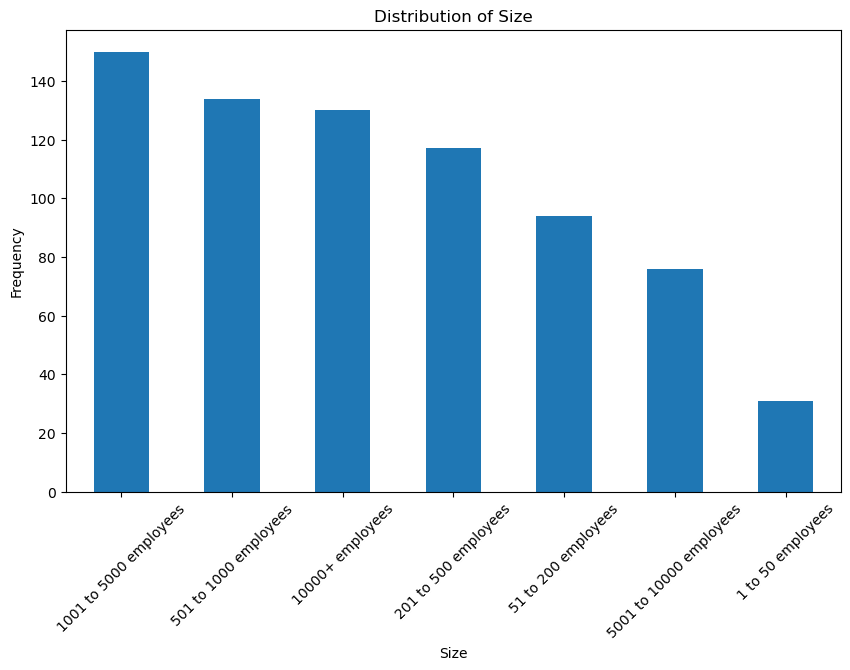

In [7]:
# Convert the 'size' column to string type
df['Size'] = data['Size'].astype(str)

# Save the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

# Suppress specific warnings from Pandas
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Plot the distribution of 'size' column
plt.figure(figsize=(10, 6))
df['Size'].value_counts().plot(kind='bar')
plt.title('Distribution of Size')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

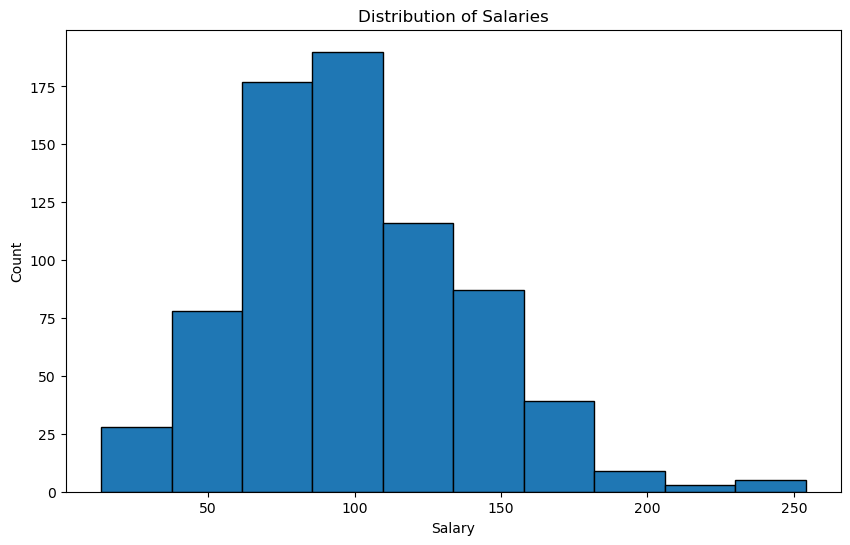

In [8]:
# Plot the histogram for the 'Salary' column
plt.figure(figsize=(10, 6))
df['avg_salary'].dropna().astype(float).plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

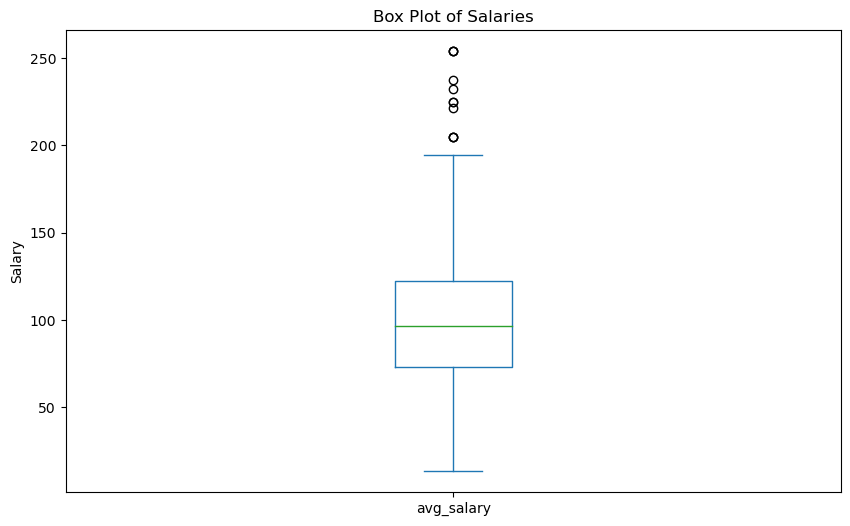

In [9]:
# Plot a box plot for the 'Salary' column
plt.figure(figsize=(10, 6))
df['avg_salary'].dropna().astype(float).plot(kind='box')
plt.title('Box Plot of Salaries')
plt.ylabel('Salary')
plt.show()

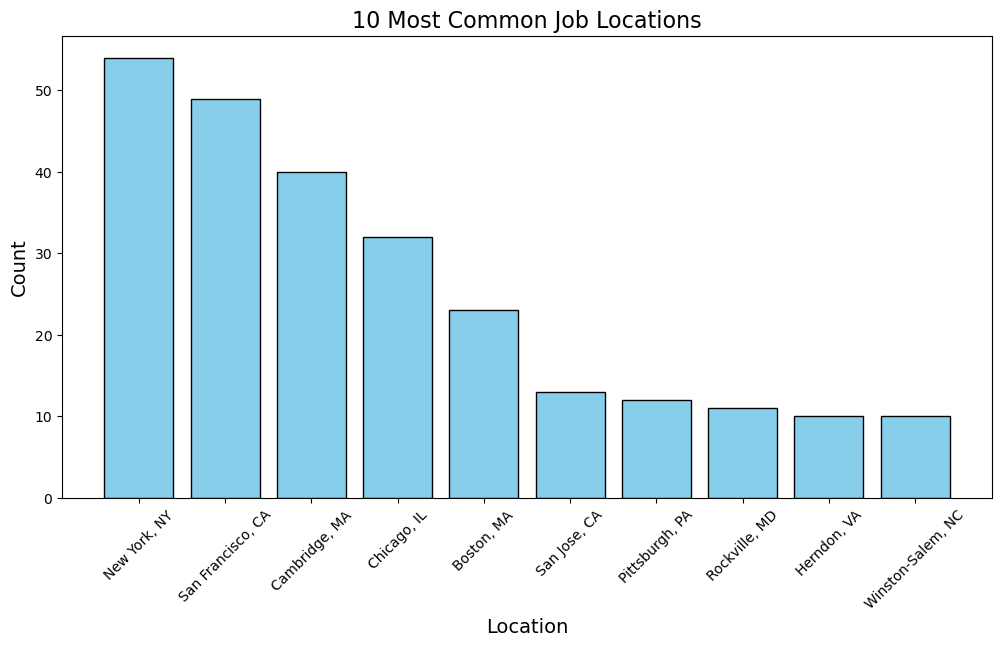

In [10]:
#Histogram of the most common locations
most_common_locations = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(most_common_locations.index, most_common_locations.values, color='skyblue', edgecolor='black')
plt.title('10 Most Common Job Locations', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

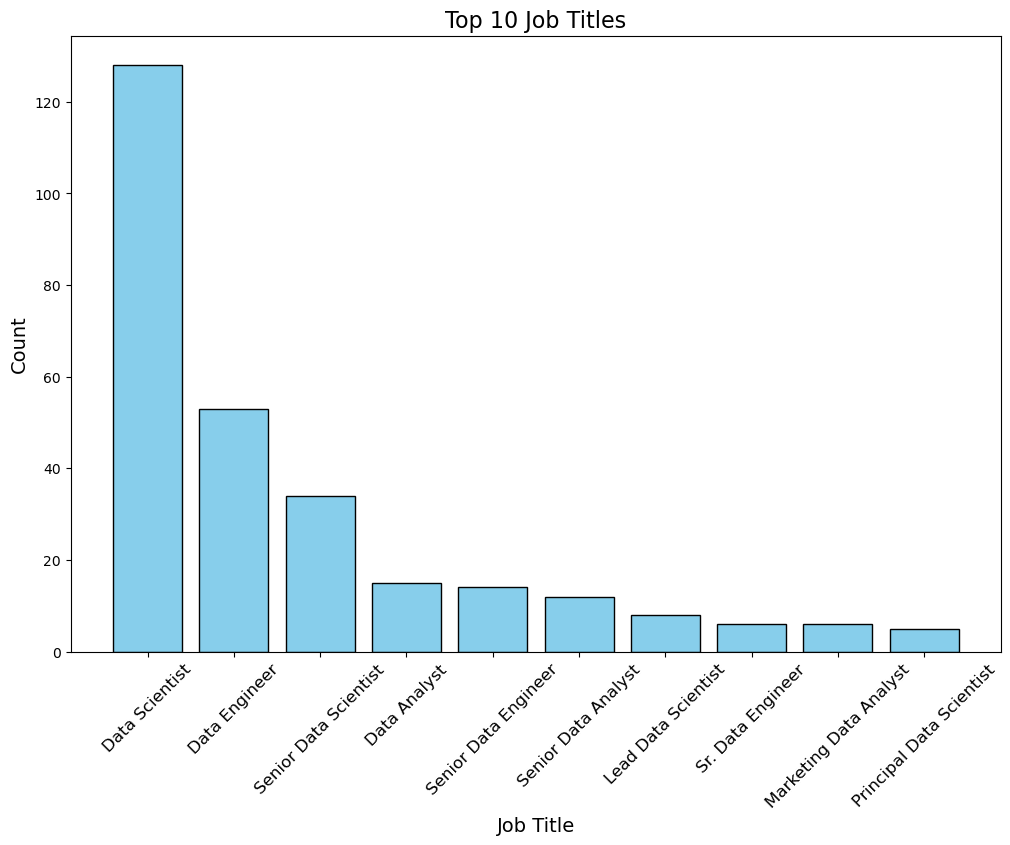

In [11]:
# Create a variable to show the most common job title's in the dataset
top_job_titles = df['Job Title'].value_counts().head(10)

# Create the bar plot for the most common job titles
plt.figure(figsize=(12, 8))
plt.bar(top_job_titles.index, top_job_titles.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

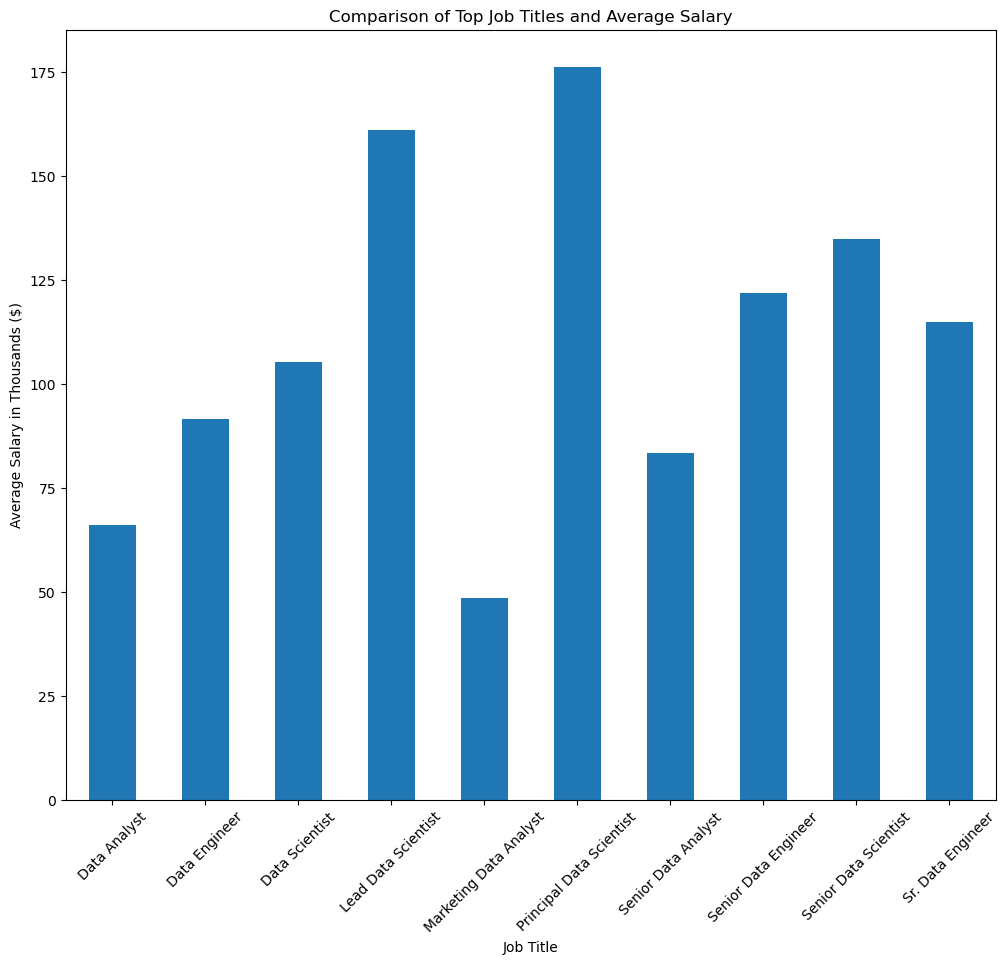

In [12]:
# Define and list the top job titles
top_job_titles = ['Data Scientist', 'Data Engineer', 'Senior Data Scientist', 'Data Analyst', 'Senior Data Engineer', 'Senior Data Analyst', 'Lead Data Scientist', 'Sr. Data Engineer', 'Marketing Data Analyst', 'Principal Data Scientist']

# Filter the DataFrame to include only the top job titles
filtered_df = df[df['Job Title'].isin(top_job_titles)]

# Calculate the average salary for each of the top job titles
avg_salary_by_title = filtered_df.groupby('Job Title')['avg_salary'].mean()

# Plot the relationship between the top job titles and average salary
plt.figure(figsize=(12, 10))
avg_salary_by_title.plot(kind='bar')
plt.title('Comparison of Top Job Titles and Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary in Thousands ($)')
plt.xticks(rotation=45)
plt.show()

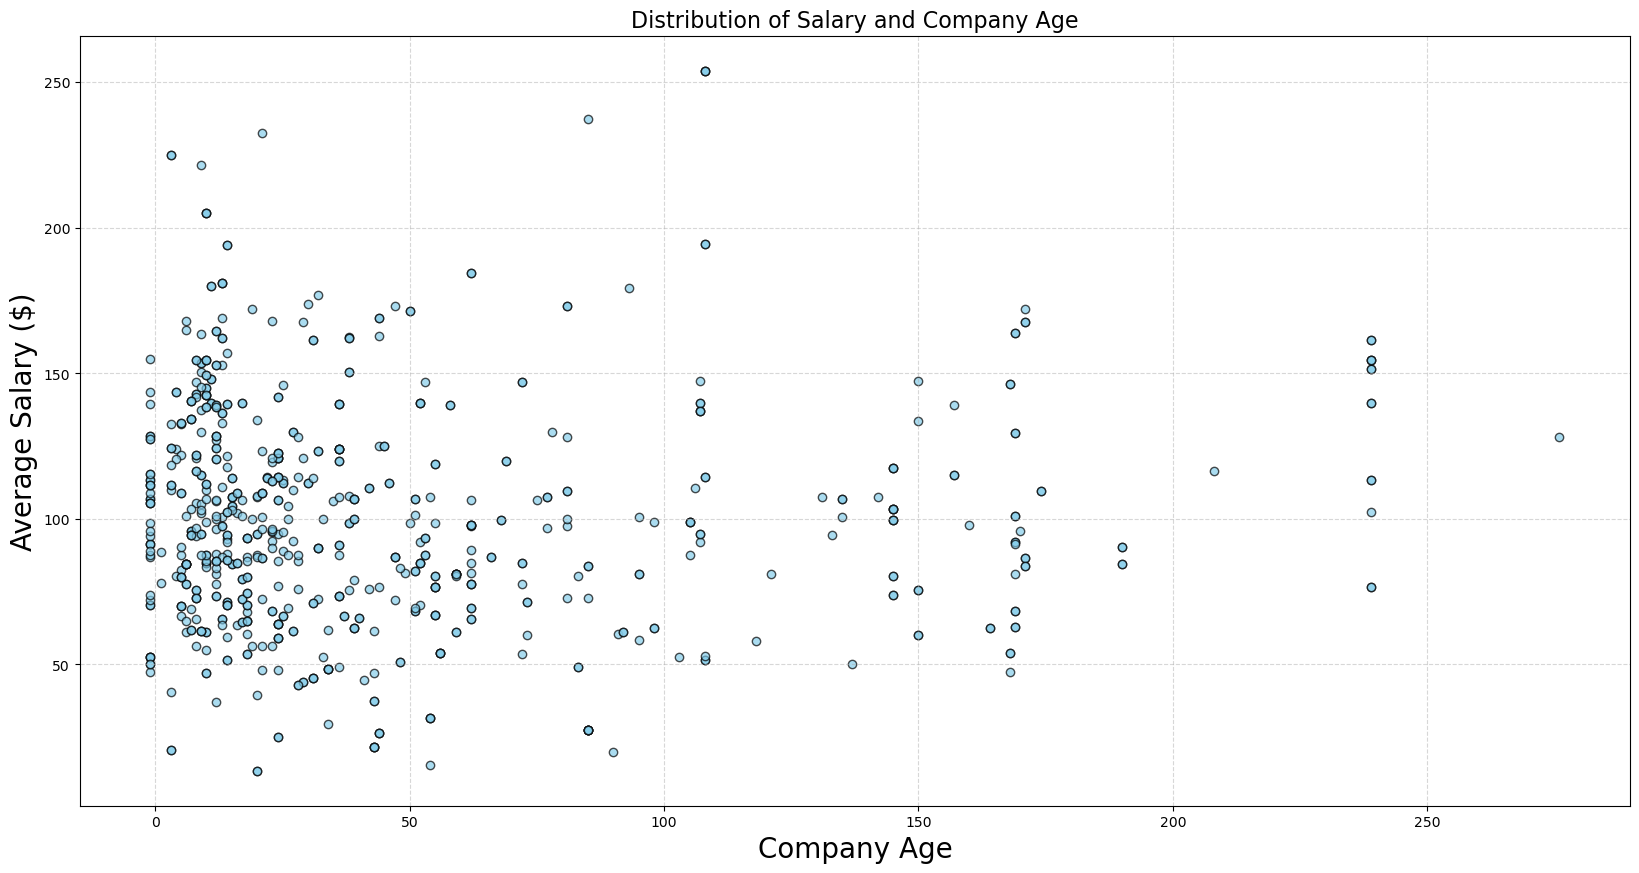

In [13]:
# Scatter plot to show the distributin of one's salary compared to their company's age
plt.figure(figsize=(20, 10))
plt.scatter(df['age'], df['avg_salary'], alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary and Company Age', fontsize=16)
plt.xlabel('Company Age', fontsize=20)
plt.ylabel('Average Salary ($)', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [14]:
# Replace all -1 values in the 'Rating' column with NaN
df['Rating'].replace(-1, pd.NA, inplace=True)

# Drop all rows with NaN values in the 'Rating' column
df.dropna(subset=['Rating'], inplace=True)

# Save the cleaned dataset to a new CSV file
df.to_csv('cleaned_jobs_dataset.csv', index=False)

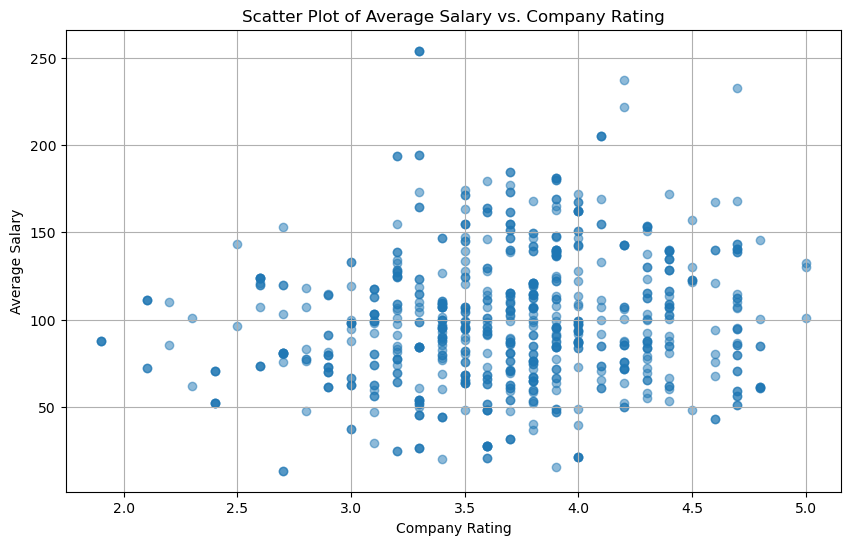

In [15]:
# Scatter plot: Average Salary vs. Company Rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['avg_salary'], alpha=0.5)
plt.title('Scatter Plot of Average Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

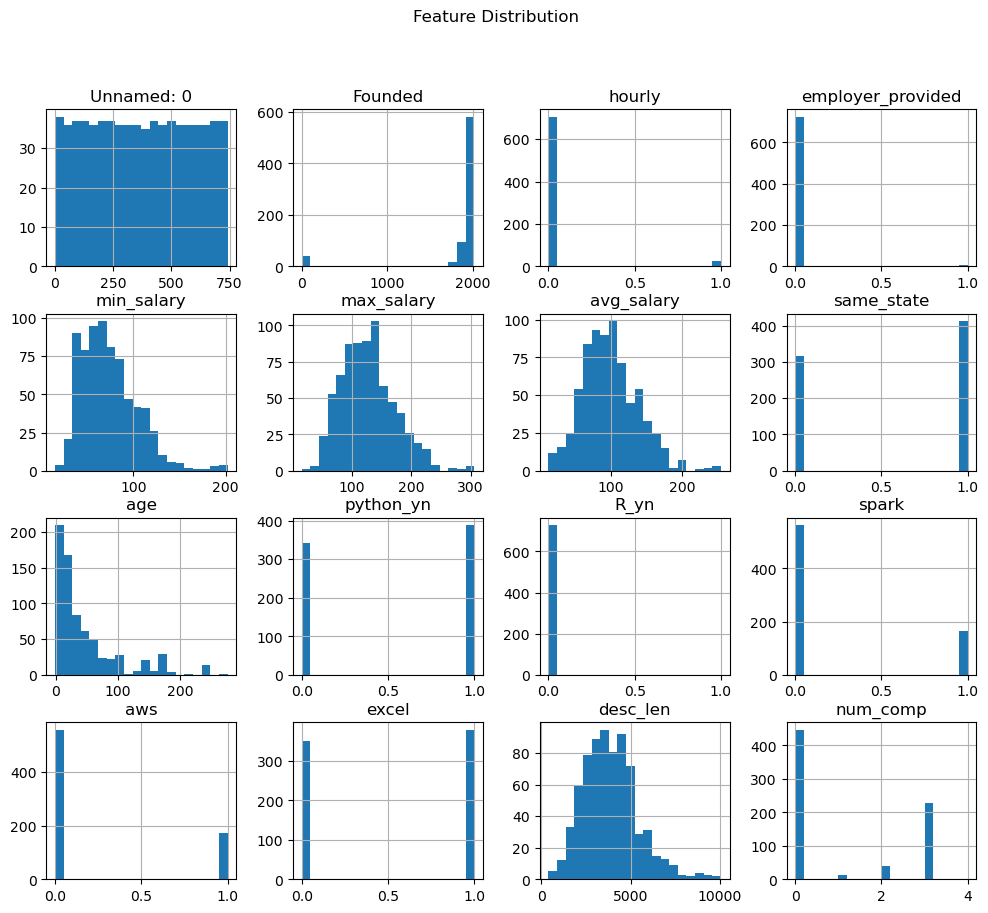

In [16]:
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distribution")
plt.show()

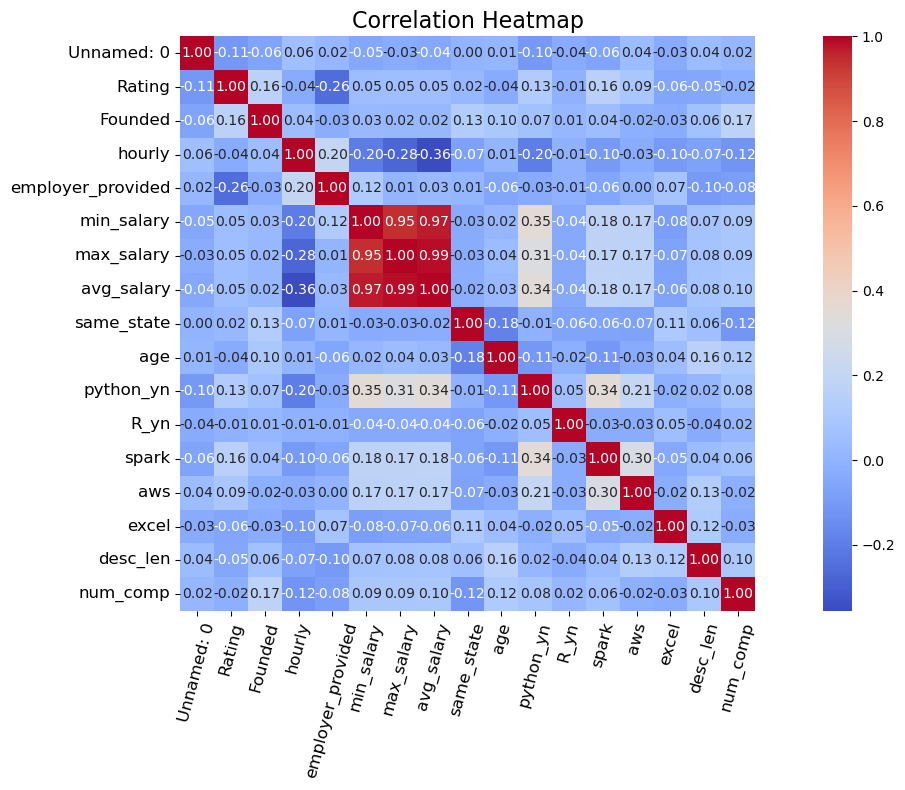

In [17]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=75, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

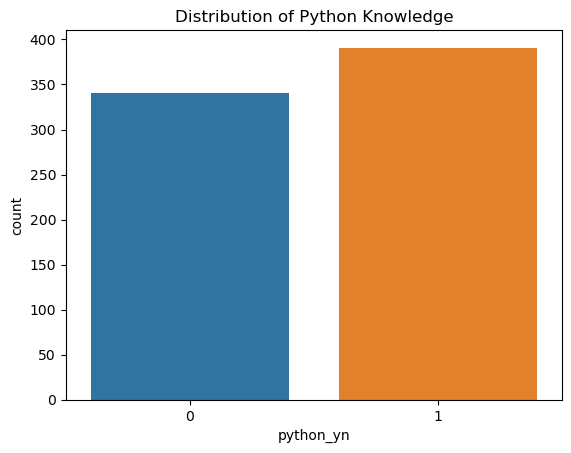

In [18]:
# Plot the distribution of the target variable for classification and Regression
sns.countplot(x='python_yn', data=data)
plt.title("Distribution of Python Knowledge")
plt.show()

In [19]:
# Select features and target variable
# For example, let's predict 'Average Salary' based on 'Rating', 'Size', and 'Job Title'
X = df[['Rating','Job Title']]
y = df['avg_salary']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2_score1=r2_score(y_pred, y_test) #score should be between 0 and 1, this did not understand the data
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2_score1)

Mean Squared Error 4.086661941498509e+28
Mean Absolute Error 54851522412382.414
R2 Score -0.007238046342224358


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset from a local file
df = pd.read_csv('cleaned_data.csv')

# Preprocess the data
df.replace(-1, pd.NA, inplace=True)
df.dropna(inplace=True)

# Select features and target variable
# For example, let's predict 'avg_salary' based on 'Rating', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue'
X = df[['Rating', 'Size', 'Founded', 'Industry', 'Sector', 'Revenue']]
y = df['avg_salary']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2_score1=r2_score(y_pred, y_test) #score should be between 0 and 1, this did not understand the data
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2_score1)

Mean Squared Error 2.9152291516569913e+26
Mean Absolute Error 3955790408490.587
R2 Score -0.01084914375349988


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset from a local file
df = pd.read_csv('cleaned_data.csv')

# Preprocess the data
df.replace(-1, pd.NA, inplace=True)
df.dropna(inplace=True)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 690 entries, 0 to 731
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         690 non-null    int64  
 1   Job Title          690 non-null    object 
 2   Salary Estimate    690 non-null    object 
 3   Job Description    690 non-null    object 
 4   Rating             690 non-null    object 
 5   Company Name       690 non-null    object 
 6   Location           690 non-null    object 
 7   Headquarters       690 non-null    object 
 8   Size               690 non-null    object 
 9   Founded            690 non-null    object 
 10  Type of ownership  690 non-null    object 
 11  Industry           690 non-null    object 
 12  Sector             690 non-null    object 
 13  Revenue            690 non-null    object 
 14  Competitors        690 non-null    object 
 15  hourly             690 non-null    int64  
 16  employer_provided  690 non-null

In [23]:
df.sample()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
126,127,Data Analytics Manager,$26K-$55K (Glassdoor est.),About You:\nWe are looking for a dedicated and...,3.8,Full Potential Solutions\n3.8,"Kansas City, MO","Kansas City, MO",501 to 1000 employees,2017,...,3,1,0,0,1,1,manager,na,4154,0


In [24]:

# Select features and target variable
X = df[['Rating', 'min_salary','max_salary','Size', 'Founded', 'Industry', 'Sector', 'Revenue','seniority', 'Type of ownership', 'age', 'job_simp']]
y = df['avg_salary']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)
r2_score1=r2_score(y_pred, y_test) 
print("Mean Squared Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2_score1)

Mean Squared Error 8.320104034776497
Mean Absolute Error 1.8164291576070575
R2 Score 0.9950812025846161


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features and target variable
X = df[['Rating', 'min_salary', 'max_salary', 'Size', 'Founded', 'Industry', 
        'Sector', 'Revenue', 'seniority', 'Type of ownership', 'age', 'job_simp']]
y = df['python_yn']  

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.73
Confusion Matrix:
[[43 21]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        64
           1       0.73      0.78      0.76        74

    accuracy                           0.73       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.73      0.73      0.73       138



In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7318840579710145

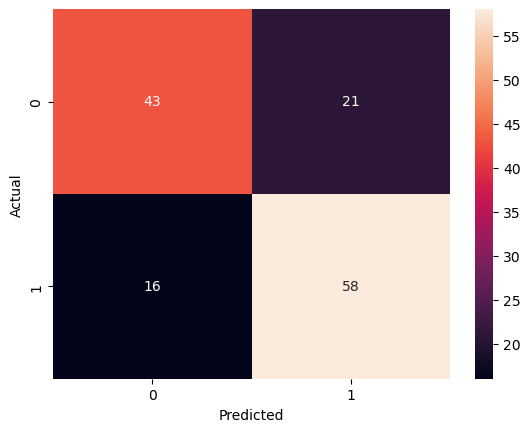

In [29]:
#  Confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()